# Project Description

### This is a project based on the winery data downloaded from Kaggle website

### We are trying to predict the points based on the other features

# Dataset Details

## The data consists of 10 fields:

- #### Country: The country that the wine is from
- #### Description: Few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
- #### Designation: The vineyard within the winery where the grapes that made the wine are from
- #### Points: The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)
- #### Price: The cost for a bottle of the wine
- #### Province: The province or state that the wine is from
- #### Region 1: The wine growing area in a province or state (ie Napa)
- #### Region 2: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
- #### Variety: the type of grapes used to make the wine (ie Pinot Noir)
- #### Winery: The winery that made the wine

### Data Types of the columns

- country    :    object
- description:    object
- designation:    object
- points     :    int64
- price      :    float64
- province   :    object
- region_1   :    object
- region_2   :    object
- variety    :    object
- winery     :    object

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as widgets
from IPython.display import display, HTML
from ipywidgets import interactive, Layout, Textarea, Dropdown, Label
HTML('<style> .widget-hbox .widget-label { max-width:350ex; text-align:left} </style>')
%matplotlib inline  

#### Definition for the layout for the Input Selection

In [2]:
form_item_layout = Layout(
    display='flex',
    #flex_flow='row',
    justify_content='space-between',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='70%'
)

## Initial Overview of Data

In [3]:
init_data = pd.read_csv("winemag-data_first150k.csv")
print("Length of dataframe before duplicates are removed:", len(init_data))

Length of dataframe before duplicates are removed: 150930


Pearson Correlation: (nan, 1.0)
                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 26 Jan 2018   Prob (F-statistic):                nan
Time:                        15:57:36   Log-Likelihood:                    nan
No. Observations:              150930   AIC:                               nan
Df Residuals:                  150930   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price             na

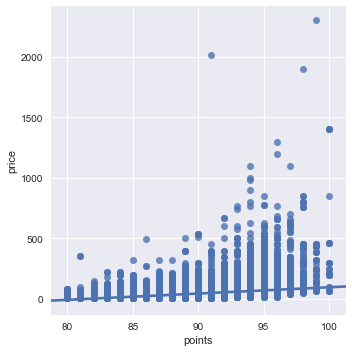

In [4]:
from scipy.stats import pearsonr
import statsmodels.api as sm
print("Pearson Correlation:", pearsonr(init_data.price, init_data.points))
print(sm.OLS(init_data.points, init_data.price).fit().summary())
sns.lmplot(y = 'price', x='points', data=init_data)

### Drop Duplicates

In [5]:
wine = init_data[init_data.duplicated('description', keep=False)]
print("Length of dataframe after duplicates are removed:", len(wine))
# parsed_data.head()

Length of dataframe after duplicates are removed: 92393


### Exploratory Data Analysis

#### Points vs Price

Pearson Correlation: (nan, 1.0)
                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 26 Jan 2018   Prob (F-statistic):                nan
Time:                        15:57:53   Log-Likelihood:                    nan
No. Observations:               92393   AIC:                               nan
Df Residuals:                   92393   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price             na

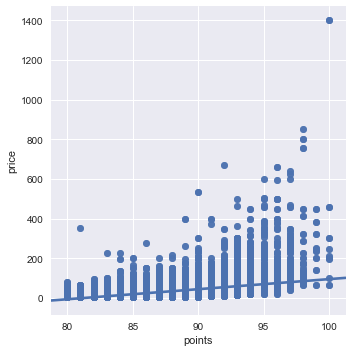

In [6]:
from scipy.stats import pearsonr
import statsmodels.api as sm
print("Pearson Correlation:", pearsonr(wine.price, wine.points))
print(sm.OLS(wine.points, wine.price).fit().summary())
sns.lmplot(y = 'price', x='points', data=wine)

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92393 entries, 25 to 150929
Data columns (total 11 columns):
Unnamed: 0     92393 non-null int64
country        92390 non-null object
description    92393 non-null object
designation    64625 non-null object
points         92393 non-null int64
price          83948 non-null float64
province       92390 non-null object
region_1       76535 non-null object
region_2       37386 non-null object
variety        92393 non-null object
winery         92393 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 11.0+ MB


#### Country vs Points

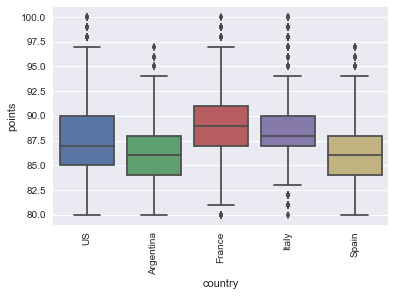

In [8]:
ax = sns.boxplot(
    x='country',
    y='points',
    data=wine[wine.country.isin(wine.country.value_counts().head(5).index)]
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### Variety vs Points

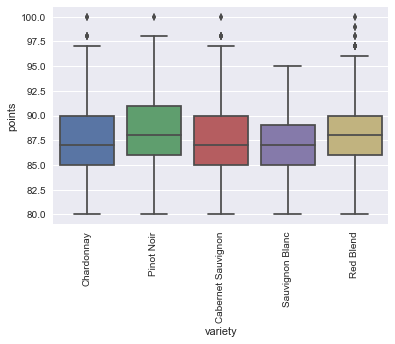

In [9]:
ax = sns.boxplot(
    x='variety',
    y='points',
    data=wine[wine.variety.isin(wine.variety.value_counts().head(5).index)]
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

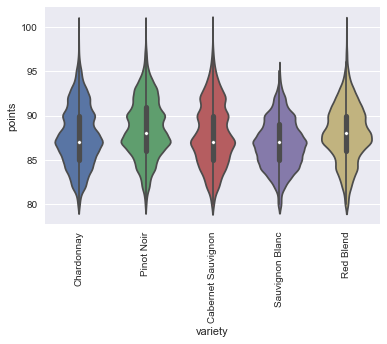

In [10]:
ax = sns.violinplot(
    x='variety',
    y='points',
    data=wine[wine.variety.isin(wine.variety.value_counts()[:5].index)]
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

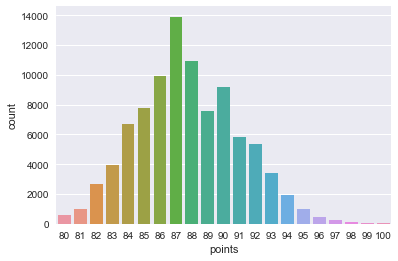

In [11]:
sns.countplot(wine['points'])

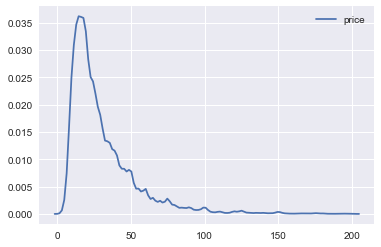

In [12]:
sns.kdeplot(wine.query('price < 200').price)

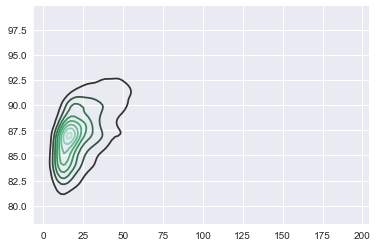

In [13]:
sns.kdeplot(wine[wine['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

## Prediction using a Decision Tree

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10)

print("dataset size before removing records with Nan's:",len(wine))
wine = wine.dropna(subset=['province','variety','country','price','points','region_1'], how='any')
print("dataset size after removing records with Nan's:",len(wine))

## create the x and y columns
x_unsplit = wine[['variety', 'price', 'winery', 'region_1']]
y_unsplit = wine['points']
## one hot encode the data
x_unsplit = pd.get_dummies(x_unsplit, columns=['variety', 'winery', 'region_1'])
print(x_unsplit.shape, y_unsplit.shape)
## get the training and testing data
X_train, X_test, y_train, y_test = train_test_split(x_unsplit, y_unsplit, random_state=1, train_size=0.90)

dataset size before removing records with Nan's: 92393
dataset size after removing records with Nan's: 69492
(69492, 8445) (69492,)


In [16]:
X_train_mean = X_train.fillna({"price": x_unsplit['price'].mean()})
X_test_mean = X_test.fillna({"price":x_unsplit['price'].mean()})
clf.fit(X_train_mean, y_train)

y_predictions = clf.predict(X_test_mean)

from sklearn.metrics import accuracy_score
dt_acc = accuracy_score(y_test,y_predictions)
print(dt_acc)

0.807194244604


#### Using Decision Tree - Accuracy approx 80% 

## Prediction using a Decision Tree

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()

In [18]:
forest_clf.fit(X_train_mean, y_train)
forest_predictions = forest_clf.predict(X_test_mean)
rf_acc = accuracy_score(y_test,forest_predictions)
print(rf_acc)

0.795251798561


#### Using Random Forest - Accuracy approx 80% 

#### 1. Creating List for categories
#### 2. Defining function for prediction

In [19]:
variety_category = sorted(parsed_data['variety'].unique().tolist())
winery_category = sorted(parsed_data['winery'].unique().tolist())
region_1_category = sorted(parsed_data['region_1'].unique().tolist())

columnList = X_test_35.columns.tolist()

def add_missing_dummy_columns( d, columns ):
    missing_cols = set( columns ) - set( d.columns )
    for c in missing_cols:
        d[c] = 0
        
def predict_points(varietyVal, priceVal, wineryVal, region1Val):
    df1 = pd.DataFrame({'variety': varietyVal, 'price': priceVal, 'winery': wineryVal, 'region_1': region1Val}, index=[0])
    new_sample = pd.get_dummies(df1)
    add_missing_dummy_columns(new_sample, columnList)
    new_sample1_prd = clf.predict(new_sample)
    print(new_sample1_prd)

NameError: name 'parsed_data' is not defined

#### Interactive dropdown to select value for Features

In [ ]:
def f1(variety):
    return variety

def f3(winery):
    return winery

def f4(region_1):
    return region_1

def f5(price):
    return price

variety = interactive(f1,variety=variety_category)
winery = interactive(f3,winery=winery_category)
region_1 = interactive(f4,region_1=region_1_category)
price = interactive(f5, price='10')

display(variety)
display(winery)
display(region_1)
display(price)

In [ ]:
selected_variety = variety.result
print(selected_variety)
selected_winery = winery.result
print(selected_winery)
selected_region_1 = region_1.result
print(selected_region_1)
selected_price = float(price.result)
print(selected_price)

In [ ]:
predict_points(selected_variety,selected_price,selected_winery,selected_region_1)